In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

from matplotlib import pyplot as plt

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [5]:
X_train[:, 0].shape

(784,)

In [6]:
def init_params():
    W1 = np.random.rand(10,784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10,10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z,0)

def softmax(Z):
    return np.exp(Z) / sum(np.exp(Z))

def forward_prop(W1,b1,W2,b2,X):
    Z1 = W1.dot(X) + b1
    A1= ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y
    
def deriv_ReLU(Z):
    return Z > 0
    
def back_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1/m * dZ2.dot(A1.T)
    db2 = 1/m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    
    dW1 = 1/m * dZ1.dot(X.T)
    db1 = 1/m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - (alpha*dW1)
    b1 = b1 - (alpha*db1)
    W2 = W2 - (alpha*dW2)
    b2 = b2 - (alpha*db2)
    return W1, b1, W2, b2
    

In [7]:
def get_predictions(A2):
    return np.argmax(A2,0)

def get_accuracy(predictions,Y):
    print(predictions,Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: " ,i)
            print("accuracy:", get_accuracy(get_predictions(A2), Y))
        
    return W1, b1, W2, b2

In [8]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[4 8 4 ... 4 9 7] [2 8 3 ... 8 5 5]
accuracy: 0.11597560975609757
Iteration:  10
[9 8 9 ... 9 7 7] [2 8 3 ... 8 5 5]
accuracy: 0.15390243902439024
Iteration:  20
[4 9 4 ... 9 9 7] [2 8 3 ... 8 5 5]
accuracy: 0.19563414634146342
Iteration:  30
[1 8 3 ... 9 3 7] [2 8 3 ... 8 5 5]
accuracy: 0.2818292682926829
Iteration:  40
[1 8 3 ... 5 3 7] [2 8 3 ... 8 5 5]
accuracy: 0.3455121951219512
Iteration:  50
[1 8 3 ... 5 3 7] [2 8 3 ... 8 5 5]
accuracy: 0.3888048780487805
Iteration:  60
[1 8 3 ... 5 3 7] [2 8 3 ... 8 5 5]
accuracy: 0.445
Iteration:  70
[1 0 3 ... 5 3 7] [2 8 3 ... 8 5 5]
accuracy: 0.5013170731707317
Iteration:  80
[2 0 3 ... 0 3 7] [2 8 3 ... 8 5 5]
accuracy: 0.5458780487804878
Iteration:  90
[2 0 3 ... 0 3 7] [2 8 3 ... 8 5 5]
accuracy: 0.5809268292682926
Iteration:  100
[2 0 3 ... 0 3 7] [2 8 3 ... 8 5 5]
accuracy: 0.6125609756097561
Iteration:  110
[6 5 3 ... 0 3 8] [2 8 3 ... 8 5 5]
accuracy: 0.6386341463414634
Iteration:  120
[6 5 3 ... 0 3 8] [2 8 3 ... 8 5 

In [9]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [2]
Label:  2


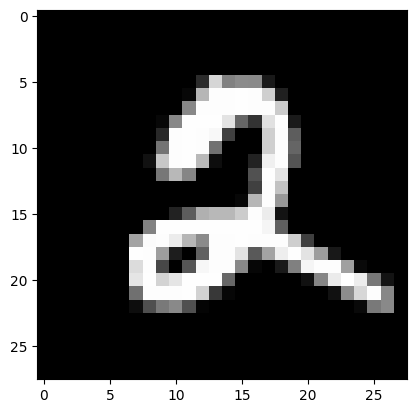

Prediction:  [8]
Label:  8


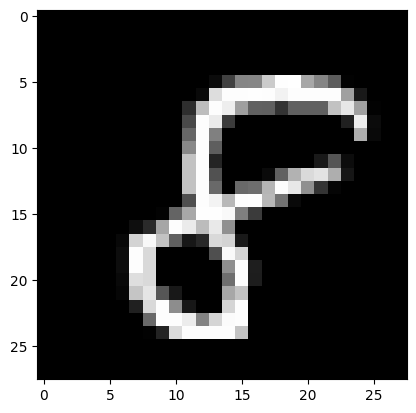

Prediction:  [3]
Label:  3


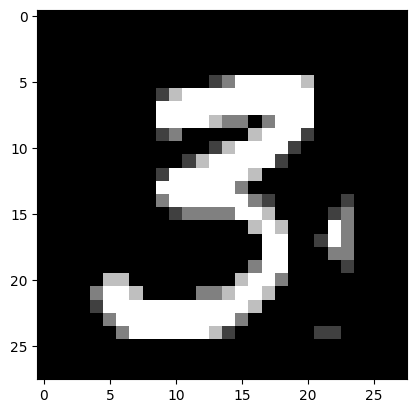

Prediction:  [0]
Label:  0


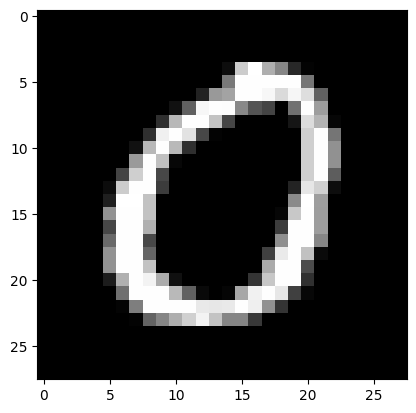

In [10]:
test_prediction(0,W1,b1,W2,b2)
test_prediction(1,W1,b1,W2,b2)
test_prediction(2,W1,b1,W2,b2)
test_prediction(3,W1,b1,W2,b2)

In [11]:
dev_predictions = make_predictions(X_dev,W1,b1,W2,b2)
get_accuracy(dev_predictions, Y_dev)

[0 8 6 6 2 3 8 5 7 4 2 9 7 5 0 1 9 9 9 4 4 3 8 5 9 4 8 9 7 2 8 9 8 7 3 3 2
 3 3 5 5 2 5 1 3 7 0 5 0 5 7 7 7 5 0 6 3 3 6 3 2 9 5 1 4 9 5 6 9 1 4 8 9 8
 0 9 7 9 5 9 5 3 5 6 7 7 4 6 8 5 7 8 5 6 0 1 8 6 9 9 1 1 8 5 2 1 5 1 1 0 6
 5 5 8 4 3 9 2 9 6 8 5 2 3 6 1 8 6 6 3 7 0 1 4 7 2 5 3 5 4 1 6 5 0 1 1 3 1
 0 6 7 5 9 9 6 4 3 1 8 4 8 2 6 0 7 2 9 7 6 7 6 0 0 1 9 2 0 1 5 4 3 9 8 6 4
 4 0 3 4 5 7 6 9 4 4 2 4 0 6 9 4 8 4 1 2 7 7 2 2 2 0 0 7 4 5 1 1 0 5 7 4 7
 8 2 2 3 0 1 1 3 6 3 5 0 0 8 9 0 2 3 4 4 0 7 5 4 9 3 4 8 7 8 4 0 3 4 3 6 8
 5 0 9 7 3 3 9 1 6 7 1 6 3 1 8 5 5 8 2 5 2 6 6 0 2 6 3 3 7 9 5 2 3 9 5 1 4
 8 9 9 0 1 4 9 2 6 2 6 0 3 5 9 7 6 3 6 3 0 9 4 6 8 8 2 3 4 9 7 5 1 1 4 9 0
 9 4 5 9 5 6 9 0 5 0 1 4 7 1 0 1 7 1 1 3 5 2 9 1 7 4 3 1 7 7 1 2 4 0 7 9 6
 0 1 8 5 0 7 8 7 6 6 8 7 9 4 4 9 7 0 9 0 6 2 0 3 4 0 1 2 0 1 8 8 1 1 1 0 6
 7 2 4 2 5 1 2 7 0 0 6 6 3 0 7 7 8 8 3 3 9 1 5 3 4 2 1 2 9 2 1 2 5 5 8 7 1
 4 6 2 9 7 7 0 6 8 2 2 1 8 8 1 9 6 9 2 7 1 8 3 6 1 7 6 9 7 3 2 6 7 8 4 9 5
 6 2 1 5 7 9 0 2 6 0 7 6 

0.848